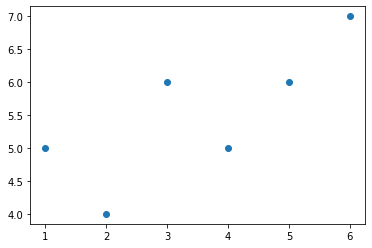

In [3]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6], dtype=np.float64)
y = np.array([5,4,6,5,6,7], dtype=np.float64)

plt.scatter(x,y)

In [14]:
#we create the best fit line for our data
def best_fit_slope_and_intercept(x, y):
    m =  ((mean(x) * mean(y)) - mean(x*y)) / (mean(x)**2 - mean(x**2))
    b = mean(y) - m*mean(x)
    return m, b

m, b = best_fit_slope_and_intercept(x, y) 
regression_line = [(m*i+b) for i in x] #for every x calculate y and add to the line list
from matplotlib import style
style.use("fivethirtyeight")

plt.scatter(x, y)
plt.plot(x, regression_line)

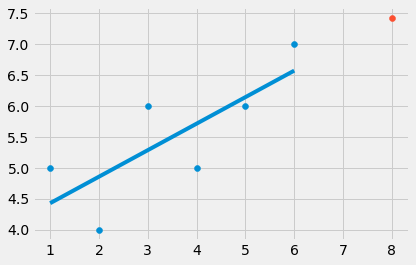

In [27]:
#we try to predict a new data with our model
predict_x = 8
predict_y = (m*predict_x) + b
plt.scatter(x, y)
plt.scatter(predict_x, predict_y)
plt.plot(x, regression_line)

In [28]:
# we try to find the accuracy of the model by using squared error
def squared_error(y_actual, y_line):
    return sum((y_line - y_actual)**2)
def coefficient_of_determination(y_actual, y_line):
    y_mean_line = [mean(y_actual) for y in y_actual]
    squared_error_regr = squared_error(y_actual, y_line)
    squared_error_y_mean = squared_error(y_actual, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)
r_square = coefficient_of_determination(y, regression_line)
r_square

0.5844155844155845

0.693817109640217

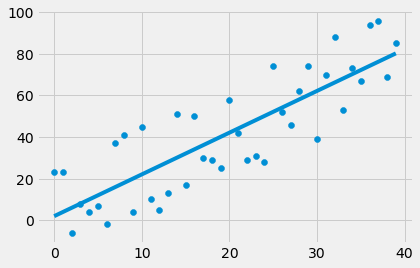

In [89]:
# Here we create a random dataset and we test the model
import random
def create_dataset(hm, variance, step=2, correlation=False): #hm: how many datapoints 
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == "pos":
            val+=step
        elif correlation and correlation == "neg":
            val -=step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

test_x, test_y = create_dataset(40, 25, 2, correlation="pos")
test_m, test_b = best_fit_slope_and_intercept(test_x, test_y)
test_regression_line = [(test_m*i + test_b) for i in test_x]

plt.scatter(test_x, test_y)
plt.plot(test_x, test_regression_line)

test_r_square = coefficient_of_determination(test_y, test_regression_line)
test_r_square